In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
!pip install pandasql
import pandasql

In [44]:
!wget 'https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/week4/bank-additional-full.csv' 

'wget' is not recognized as an internal or external command,
operable program or batch file.


#1.     Preview the data

In [45]:
df = pd.read_csv('bank-additional-full.csv',sep = ';' )
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


How many rows of data are there in total?

In [47]:
df.shape

(41188, 21)

How many numeric & categorical variables are there each?


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

How is the distribution of the target variable?

In [49]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

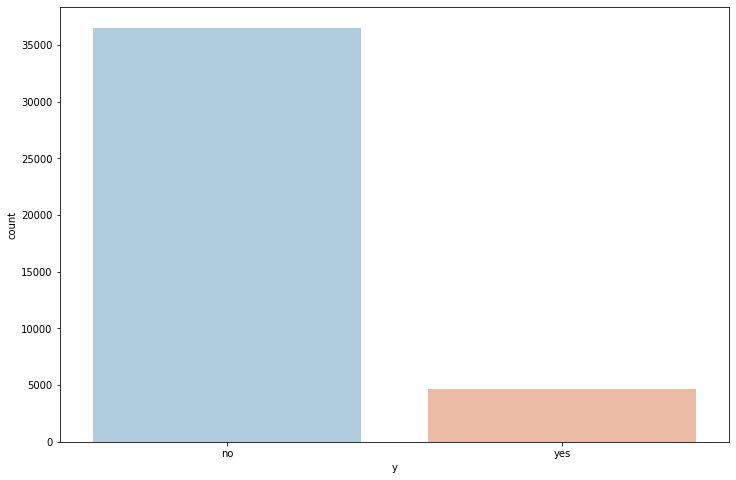

In [50]:
sns.countplot(x='y', data=df, palette='RdBu_r')

In [51]:
# pandasql.sqldf("SELECT y, COUNT(y) FROM df GROUP BY y;")

In [52]:
# def countUnknown(col):
#   print(col, pandasql.sqldf(f"SELECT COUNT(*) FROM df WHERE `{col}` == 'unknown';"))

# for col in df.columns:
#   countUnknown(col)

# 2. Impute missing 

How many variables are there with all missing values?

In [53]:
df.replace('unknown', np.nan, inplace=True) # replace all unknown with NaN

In [54]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Show missing values, for numeric variables, fill with mean, and if categorical variables, fill with mode.

In [55]:
# impute category NaN with mode

df.fillna(df.mode().iloc[0], inplace=True)

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [56]:
# drop flat value - same value more than 70%

for i in df.columns:
  if df[i].value_counts().max() > 0.7 * df.shape[0] and i != 'y':
    del df[i]
    
df.shape

(41188, 16)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   contact         41188 non-null  object 
 6   month           41188 non-null  object 
 7   day_of_week     41188 non-null  object 
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 5.0+ MB


# 3. Split train/test for 70%:30% with random_state=0 & stratify option

In [58]:
# convert category to dummy

# include target
#            |
#            V
cat_cols = ['y', 'job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week']
df_with_dummy = pd.get_dummies(df[cat_cols], drop_first= True)
df_with_dummy = pd.concat([df, df_with_dummy], axis=1)
df_with_dummy = df_with_dummy.drop(cat_cols, axis=1)
df = df_with_dummy

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   emp.var.rate                   41188 non-null  float64
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   nr.employed                    41188 non-null  float64
 8   y_yes                          41188 non-null  uint8  
 9   job_blue-collar                41188 non-null  uint8  
 10  job_entrepreneur               41188 non-null  uint8  
 11  job_housemaid                  41188 non-null  uint8  
 12  job_management                 41188 non-null 

In [60]:
from sklearn.model_selection import train_test_split

y = df.pop('y_yes')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 0)

How much data is contained in the train set for each class?

In [61]:
y_train.value_counts()

0    25583
1     3248
Name: y_yes, dtype: int64

  How much data is contained in the test set for each class?

In [62]:
y_test.value_counts()

0    10965
1     1392
Name: y_yes, dtype: int64

# 5. Model1: Build a model that uses all variables.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
model_1 = LogisticRegression(random_state=0)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

C:\Users\Thanin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(classification_report(y_test, y_pred, digits=4))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9205    0.9762    0.9475     10965
           1     0.6415    0.3355    0.4406      1392

    accuracy                         0.9040     12357
   macro avg     0.7810    0.6558    0.6940     12357
weighted avg     0.8890    0.9040    0.8904     12357



[[10704   261]
 [  925   467]]


# 6. Model2: Select a variable using backward selection, leaving 5 initial variables left.

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

log = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0)
sbs = sfs(log, k_features = 5, forward=False, floating=False, verbose=2, n_jobs=-1, scoring='accuracy', cv=5)
sbs = sbs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:  1.9min remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  2.1min finished

[2022-02-07 22:35:07] Features: 40/5 -- score: 0.9068017457442779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  2.0min remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished

[2022-02-07 22:37:22] Features: 39/5 -- score: 0.9065936231844309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:  1.8min remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  1.8min finished

[2022-02-07 22:39:13] Features: 38/5 -- score: 0.9069057

In [92]:
feat_cols = list(sbs.k_feature_idx_)

model_2 = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0)
model_2.fit(X_train.iloc[:,feat_cols],y_train)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
feat_cols

In [84]:
y_pred = model_2.predict(X_test.iloc[:,feat_cols])
print(classification_report(y_test, y_pred, digits=4))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9223    0.9759    0.9484     10965
           1     0.6503    0.3527    0.4574      1392

    accuracy                         0.9057     12357
   macro avg     0.7863    0.6643    0.7029     12357
weighted avg     0.8917    0.9057    0.8931     12357



[[10701   264]
 [  901   491]]


# 7. Model3: Build a model in your own version, which gets the macro F1 value more accurate than Model1 & Model2.

In [97]:
log = LogisticRegression(solver='lbfgs', max_iter=5000)
sbs = sfs(log, k_features = 20, forward=True, floating=False, verbose=2, n_jobs=-1, scoring='accuracy', cv=5)
sbs = sbs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.0s finished

[2022-02-07 23:39:46] Features: 1/20 -- score: 0.8927889259046277[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished

[2022-02-07 23:39:50] Features: 2/20 -- score: 0.8967431643229947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:    4.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    4.2s finished

[2022-02-07 23:39:54] Features: 3/20 -- score: 0.8977837

In [98]:
feat_cols = list(sbs.k_feature_idx_)

model_3 = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0)
model_3.fit(X_train.iloc[:,feat_cols],y_train)

LogisticRegression(max_iter=5000, random_state=0)

In [99]:
feat_cols

[0, 1, 3, 5, 6, 8, 9, 10, 13, 14, 20, 21, 23, 25, 27, 28, 31, 33, 37, 38]

In [100]:
y_pred = model_3.predict(X_test.iloc[:,feat_cols])
print(classification_report(y_test, y_pred, digits=4))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9233    0.9733    0.9476     10965
           1     0.6328    0.3628    0.4612      1392

    accuracy                         0.9045     12357
   macro avg     0.7780    0.6680    0.7044     12357
weighted avg     0.8905    0.9045    0.8928     12357



[[10672   293]
 [  887   505]]
